# Load Dataset

1. Load Data
2. Check your data: data types, missing data
3. Check simple statistic from your data
4. Let's think what tools that we will try. Data Preprocessing Pla, Model Plan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd  # import pandas for data manipulation
pd.options.display.max_columns = None  # set options max_columns to None to display all columns

data = pd.read_csv('credit_risk_dataset.csv')

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.shape

(32581, 12)

In [5]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Simple Statistics

In [6]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
data.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [8]:
data['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

### Exploratory Data

In [9]:
num_columns = data.drop(columns='loan_status').select_dtypes(include='number').columns.tolist()
cat_columns = data.select_dtypes(exclude=['number']).columns.tolist()

print("Total numerical columns :", len(num_columns))
print("Total categorical columns :", len(cat_columns))

Total numerical columns : 7
Total categorical columns : 4


In [10]:
num_idx = [data.columns.get_loc(c) for c in num_columns]
cat_idx = [data.columns.get_loc(c) for c in cat_columns]

In [11]:
data.columns[num_idx]

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [12]:
data.columns[cat_idx]

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [13]:
for col in cat_columns:
    print(f"{col:<20}: {data[col].unique().tolist()}")

person_home_ownership: ['RENT', 'OWN', 'MORTGAGE', 'OTHER']
loan_intent         : ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
loan_grade          : ['D', 'B', 'C', 'A', 'E', 'F', 'G']
cb_person_default_on_file: ['Y', 'N']


## Correlated Features

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_correlation(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig = plt.figure(figsize=(10, 10))

    ax = sns.heatmap(
        corr, 
        mask=mask,
        vmin=-1, vmax=1, center=0,
        cmap='coolwarm',
        square=True,
        linewidths=0.3,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 8},
        cbar_kws={"shrink": .5}
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    ax.set_title("Correlation", size=14)

    plt.show()

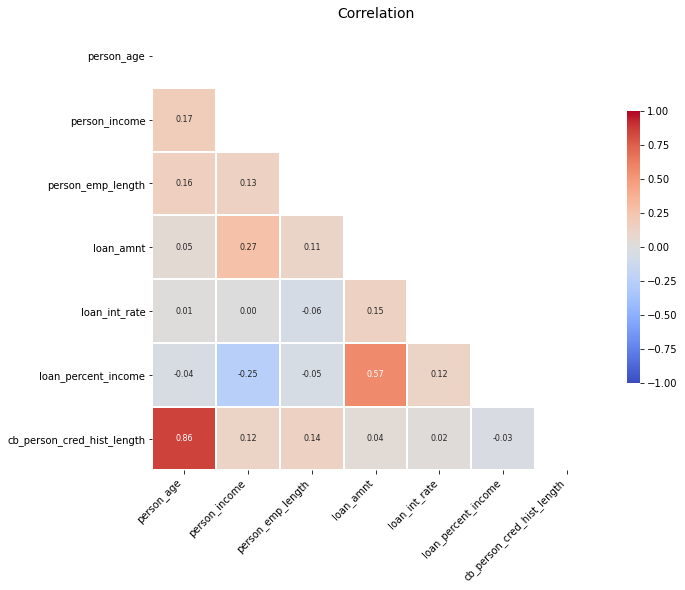

In [15]:
plot_correlation(data[num_columns])

### Check duplicate data 

In [16]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


### Check missing value

In [17]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Data Preprocess

distinguish numerical and categorical variable since it will have a different approach of preprocessing

In [18]:
# Drop duplicate rows
data.drop_duplicates(keep="first", inplace=True)

In [19]:
# Weird data
outlier1 = data[data['person_age'] > 100].index
outlier2 = data[data['person_age'] < data['person_emp_length']].index

data.drop(outlier1, inplace=True)
data.drop(outlier2, inplace=True)

### Spliting Data

In [20]:
y = data['loan_status'].copy()
X = data.drop(columns='loan_status').copy()

In [21]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

print("Number of Train :", len(y_train), f"{round(len(y_train) / len(y) * 100, 2)}%")
print("Number of Test :", len(y_test), f"{round(len(y_test) / len(y) * 100, 2)}%")

Number of Train : 22686 70.0%
Number of Test : 9723 30.0%


In [22]:
def get_data_by_types(X_train, X_test):
    X_train_num, X_train_cat = X_train[num_columns], X_train[cat_columns]
    X_test_num, X_test_cat = X_test[num_columns], X_test[cat_columns]
    return X_train_num, X_train_cat, X_test_num, X_test_cat

In [23]:
X_train_num, X_train_cat, X_test_num, X_test_cat = get_data_by_types(X_train, X_test)

#### categorical variable

In [24]:
data['loan_intent'].value_counts()

EDUCATION            6409
MEDICAL              6042
VENTURE              5679
PERSONAL             5496
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: loan_intent, dtype: int64

In [24]:
# Create a function to preprocess categorical variable

from sklearn.preprocessing import OrdinalEncoder
from xverse.transformer import WOE

def preprocess_categorical(X_train_cat, X_test_cat, y_train):
    ordinal = OrdinalEncoder()
    ordinal.fit(X_train_cat['loan_grade'].values.reshape(-1,1))
    
    X_train_cat['loan_grade'] = ordinal.transform(X_train_cat['loan_grade'].values.reshape(-1,1))
    X_test_cat['loan_grade'] = ordinal.transform(X_test_cat['loan_grade'].values.reshape(-1,1))

    clf = WOE()
    clf.fit(X_train_cat, y_train)
    X_train_cat = clf.transform(X_train_cat)
    
    output_woe_bins_cat = clf.woe_bins                      #future transformation
    output_mono_bins_cat = clf.mono_custom_binning          #future transformation
    clf = WOE(woe_bins=output_woe_bins_cat, mono_custom_binning=output_mono_bins_cat) #output_bins was created earlier
    
    X_test_cat = clf.transform(X_test_cat)
    
    X_train_cat = pd.DataFrame(X_train_cat, index=X_train.index)
    X_test_cat = pd.DataFrame(X_test_cat, index=X_test.index)

    return X_train_cat, X_test_cat

In [25]:
X_train_num, X_train_cat, X_test_num, X_test_cat = get_data_by_types(X_train, X_test)
X_train_cat, X_test_cat = preprocess_categorical(X_train_cat, X_test_cat, y_train)

#### Numerical Variable

In [ ]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train.loc[:, num_columns])

In [ ]:
# X_train_num = sc.transform(X_train[num_columns])
# X_test_num = sc.transform(X_test[num_columns])

In [26]:
# Create a function to preprocess categorical variable
from sklearn.impute import SimpleImputer
def preprocess_numerical(X_train_num, X_test_num, y_train):
    X_train_num.loc[-1]=[0., 0, 0, 0, 0, 0 ,0]
    y_train.loc[-1]=0

    clf = WOE()
    clf.fit(X_train_num, y_train)
    
    X_train_num = clf.transform(X_train_num)
    
    output_woe_bins = clf.woe_bins                      #future transformation
    output_mono_bins = clf.mono_custom_binning          #future transformation
    clf = WOE(woe_bins=output_woe_bins, mono_custom_binning=output_mono_bins) #output_bins was created earlier
    X_test_num = clf.transform(X_test_num)
    
    X_train_num.drop(-1, inplace=True)
    y_train.drop(-1, inplace=True)

    return X_train_num, X_test_num

In [27]:
X_train_num, X_test_num = preprocess_numerical(X_train_num, X_test_num, y_train)

In [28]:
X_train_trans = X_train_num.join(X_train_cat)
X_test_trans = X_test_num.join(X_test_cat)

In [29]:
X_test_trans.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
31598,-0.074522,-0.218313,-0.138342,-0.154364,-0.316331,-0.743174,-0.052060,0.497900,-0.155702,-0.628973,-0.216648
19006,-0.074522,0.694848,0.293182,0.295253,-0.316331,0.885326,-0.052060,0.497900,0.246998,-0.628973,-0.216648
14302,-0.026946,-0.813357,0.293182,0.295253,-0.316331,-0.407493,0.063486,0.497900,0.257635,-0.628973,-0.216648
20311,-0.074522,0.694848,-0.291921,-0.154364,-0.316331,-0.743174,-0.026116,-0.649888,0.364197,-0.628973,-0.216648
15425,0.083890,-0.813357,0.293182,-0.154364,-0.948952,-0.743174,0.063486,-0.649888,-0.257891,-0.628973,-0.216648


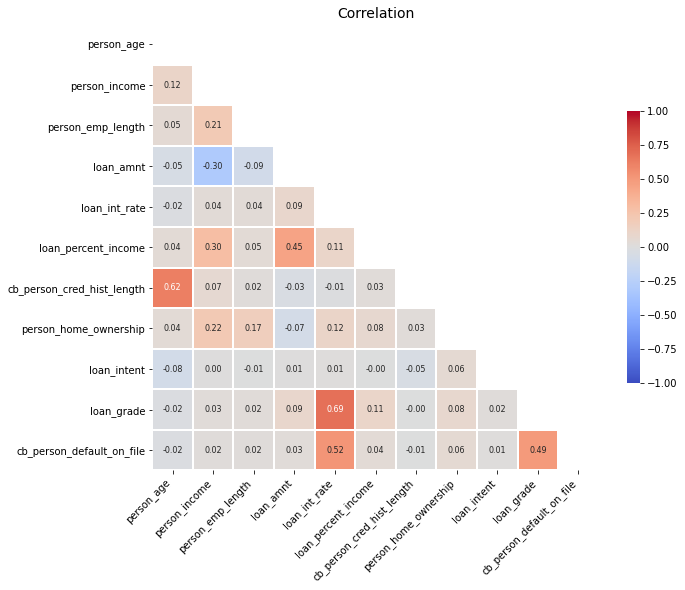

In [30]:
plot_correlation(X_train_trans)

## Hyperparameter Tuning

### Simple Hyperparameter Tuning - GridSearchCV

In [32]:
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=SEED)

param_space = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "max_iter": [1000],
    "random_state": [SEED]
}

clf = GridSearchCV(lr, 
                   param_space, 
                   scoring='roc_auc', 
                   cv=4, 
                   refit=True)

In [33]:
clf.fit(X_train_trans, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000], 'random_state': [42]},
             scoring='roc_auc')

In [34]:
yhat_train = clf.predict_proba(X_train_trans)[:, 1]
yhat_test = clf.predict_proba(X_test_trans)[:, 1]

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.8521402184928635
ROC-AUC TEST 0.8560266523486583


In [ ]:
import pickle 


MODELNAME = 'M-LR-1.0.0.pkl'
PREPROCESSNAME = 'FE-SC-IMP-OHE-1.0.0.pkl'

final_model = clf.best_estimator_.named_steps['model']
final_pipe = clf.best_estimator_.named_steps['preprocess']

with open(MODEL, 'wb') as f: # save model
    pickle.dump(final_model, f)
    
with open(PREPROCESS, 'wb') as f: # save pipeline
    pickle.dump(final_pipe, f)

# Pipeline

### Hyperparameter Tuning with Pipeline - GridSearchCV

In [ ]:
# # Create a function to preprocess categorical variable

# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from xverse.transformer import WOE

# def preprocess_categorical(df):

    
#     ordinal = OrdinalEncoder()
#     ordinal.fit(df['loan_grade'].values.reshape(-1,1))
    
#     df['loan_grade'] = ordinal.transform(df['loan_grade'].values.reshape(-1,1))
    
#     clf = WOE()
#     clf.fit(df[cat_columns], y_train)
    
#     df[cat_columns] = clf.transform(df[cat_columns])
    
#     df[cat_columns] = pd.DataFrame(df[cat_columns], index=df[cat_columns].index)

#     return df

In [ ]:
# # Create a function to preprocess categorical variable
# from sklearn.impute import SimpleImputer
# def preprocess_numerical(df):
     
#     df.loc[-1]=[0., 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0]
#     y_train.loc[-1]=0

#     clf = WOE()
#     clf.fit(df[num_columns], y_train)
    
#     df[num_columns] = clf.transform(df[num_columns])
    
#     y_train.drop(-1, inplace=True)
#     df.drop(-1, inplace=True)
    
#     return df

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from xverse.feature_subset import SplitXY

# from sklearn.preprocessing import FunctionTransformer
# cat_transformer = FunctionTransformer(preprocess_categorical, validate=False)
# num_transformer = FunctionTransformer(preprocess_numerical, validate=False)

# # cat_pipe = Pipeline(steps=[
# # #     ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
# # #     ('ordinal', OrdinalEncoder(drop="first")),
# #     ('woe', WOE())
# # ])

# # num_pipe = Pipeline(steps=[
# # #     ('imputer', SimpleImputer(strategy="mean")),
# # #     ('scaler', StandardScaler()),
# #     ('woe', WOE())
# # ])


# # ordinal = Pipeline(steps=[
# # #     ('imputer', SimpleImputer(strategy="mean")),
# # #     ('scaler', StandardScaler()),
# #     ('woe', WOE())
# # ])

# # preprocess = ColumnTransformer(transformers=[
# # #     ('split_x_y', SplitXY(['loan_status'])),
# #     ('cat', cat_transformer),
# #     ('num', num_transformer),
# # ], remainder='passthrough')


# full_pipe = Pipeline(steps=[
#     ('preprocess_categorical', cat_transformer),
#     ('preprocess_numerical', num_transformer),
#     ('model', LogisticRegression(random_state=SEED, max_iter=1000)),
    
# ], verbose=False)

In [ ]:
from xverse.transformer import WOE
X_train.loc[-1]=[0., 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]
y_train.loc[-1]=0

X_train.loc[-2]=[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
y_train.loc[-2]= 0

clf = WOE()
clf.fit(X_train, y_train)
X_train = clf.transform(X_train)

output_woe_bins = clf.woe_bins
output_woe_bins

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

print("Number of Train :", len(y_train), f"{round(len(y_train) / len(y) * 100, 2)}%")
print("Number of Test :", len(y_test), f"{round(len(y_test) / len(y) * 100, 2)}%")

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV

preprocess = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy="constant", fill_value=np.nan)),
    ('woe', WOE(woe_bins=output_woe_bins)),
])

full_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(random_state=SEED, max_iter=1000)),
    
], verbose=False)

In [ ]:
param_space = {
    "model__C": [0.0001, 0.001, 0.01, 0.1, 2, 1, 3, 4, 5, 10, 100, 1000],
    "model__max_iter": [1000],
    "model__random_state": [SEED]
}

clf = GridSearchCV(full_pipe, 
                   param_space, 
                   scoring='roc_auc', 
                   cv=5, 
                   refit=True)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_estimator_.named_steps['model']

# Without WOE

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV


cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")),
    ('ohe', OneHotEncoder(drop="first"))
])

num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
])

preprocess = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_columns),
    ('num', num_pipe, num_columns)
], remainder='passthrough')


full_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(random_state=1234, max_iter=1000))
])

In [35]:
param_space = {
    "model__C": [0.0001, 0.001, 0.01, 0.1, 2, 1, 3, 4, 5, 10, 100, 1000],
    "model__max_iter": [1000],
    "model__random_state": [1234]
}

clf = GridSearchCV(full_pipe, 
                   param_space, 
                   scoring='roc_auc', 
                   cv=5, 
                   refit=True)

In [36]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
   

In [37]:
yhat_train = clf.predict_proba(X_train)[:, 1]
yhat_test = clf.predict_proba(X_test)[:, 1]

In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(y_train, 
                                                  yhat_train)
fpr_test, tpr_test, thresholds_test =roc_curve(y_test, 
                                               yhat_test)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.8695007354927009
ROC-AUC TEST 0.8710780521746281


In [39]:
import pickle 


MODEL = 'model.pkl'
PREPROCESS = 'preprocess.pkl'

final_model = clf.best_estimator_.named_steps['model']
final_pipe = clf.best_estimator_.named_steps['preprocess']

with open(MODEL, 'wb') as f: # save model
    pickle.dump(final_model, f)
    
with open(PREPROCESS, 'wb') as f: # save pipeline
    pickle.dump(final_pipe, f)

In [40]:
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def get_optimal_cutoff(tpr, fpr, thresholds):
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({
        'fpr' : pd.Series(fpr, index=i),
        'tpr' : pd.Series(tpr, index = i), 
        '1-fpr' : pd.Series(1-fpr, index = i), 
        'tf' : pd.Series(tpr - (1-fpr), index = i), 
        'thresholds' : pd.Series(thresholds, index = i)})
    
    print(roc.iloc[[(roc.tf-0).abs().argmin()]])

    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    _ = plt.plot(roc['tpr'])
    _ = plt.plot(roc['1-fpr'], color = 'red')
    _ = plt.xlabel('1-False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    _ = ax.set_xticklabels([])
    
    
def plot_roc_auc(tpr, fpr, labels):
    
    if (isinstance(tpr, (list, np.array)) and isinstance(fpr, (list, np.array))):
        
        nlist = len(tpr)
        
        if all(len(val) == nlist for val in [tpr, fpr, labels]):
            pass
        else:
            raise ValueError('length of parameter should be the same')
               
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        
        for i in range(nlist):
        
            roc_auc = auc(fpr[i], tpr[i])
            _ = ax.plot(
                fpr[i], 
                tpr[i], 
                label=f'ROC curve {labels[i]} (area = {roc_auc: 0.2f}'
            )
        
        _ = fig.legend(loc="right")
        
    else:
        roc_auc = auc(fpr, tpr)
        
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        _ = ax.plot(
            fpr, 
            tpr, 
            label=f'ROC curve {labels} (area = {roc_auc: 0.2f}'
        )
        
    _ = fig.legend(loc="right")

           fpr       tpr     1-fpr        tf  thresholds
1171  0.206002  0.793979  0.793998 -0.000018    0.195074


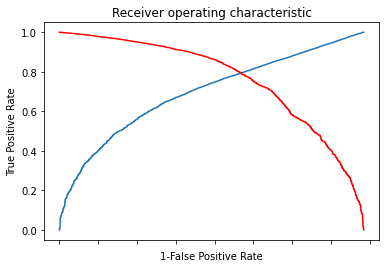

In [41]:
tpr = tpr_test
fpr = fpr_test

thresholds = thresholds_test
get_optimal_cutoff(tpr, fpr, thresholds)

In [42]:
threshold = 0.195303

y_pred_train = np.where(yhat_train > threshold, 1, 0)
y_pred_test = np.where(yhat_test> threshold, 1, 0)

print(classification_report(y_test, 
                            y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7597
           1       0.52      0.79      0.63      2126

    accuracy                           0.79      9723
   macro avg       0.73      0.79      0.74      9723
weighted avg       0.84      0.79      0.81      9723



In [43]:
threshold = 0.313929

y_pred_train = np.where(yhat_train > threshold, 1, 0)
y_pred_test = np.where(yhat_test> threshold, 1, 0)

print(classification_report(y_test, 
                            y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7597
           1       0.65      0.71      0.68      2126

    accuracy                           0.85      9723
   macro avg       0.78      0.80      0.79      9723
weighted avg       0.86      0.85      0.85      9723



In [44]:
X_train.loc[:, 'loan_status'] = y_train
X_train.loc[:, 'score_proba'] = yhat_train
X_test.loc[:, 'loan_status'] = y_test
X_test.loc[:, 'score_proba'] = yhat_test

In [45]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,score_proba
31598,40,50000,RENT,3.0,PERSONAL,B,2000,11.49,0.04,N,17,0,0.054305
19006,34,30000,RENT,2.0,HOMEIMPROVEMENT,B,14975,12.53,0.50,N,10,1,0.940409
14302,25,100000,RENT,1.0,MEDICAL,B,14400,11.71,0.14,N,3,0,0.101679
20311,30,40000,MORTGAGE,9.0,DEBTCONSOLIDATION,B,3000,11.71,0.07,N,7,0,0.063527
15425,24,135000,MORTGAGE,0.0,EDUCATION,A,6000,6.92,0.04,N,2,0,0.010676


## Save Your Model

In [46]:
import pickle 


MODEL = 'model.pkl'
PREPROCESS = 'preprocess.pkl'

final_model = clf.best_estimator_.named_steps['model']
final_pipe = clf.best_estimator_.named_steps['preprocess']

with open(MODEL, 'wb') as f: # save model
    pickle.dump(final_model, f)
    
with open(PREPROCESS, 'wb') as f: # save pipeline
    pickle.dump(final_pipe, f)

In [ ]:
X_train.to_csv('train.csv')
X_test.to_csv('test.csv')

In [ ]:
pd.DataFrame(clf.cv_results_)

## Full implementation (preproecss + feature selection + algorithm selection)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
sc = StandardScaler()
lr = LogisticRegression(random_state=SEED)
rf = RandomForestClassifier(n_estimators=10, random_state=SEED)
rfe = RFE(lr)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('encoder', OneHotEncoder()),
                 ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
                 ('selector', rfe),
                 ('classifier', LogisticRegression(random_state=True))])

In [ ]:
search_space = [
                {'selector': [RFE(estimator=lr)],
                 'selector__n_features_to_select': [6,  8],
                 'classifier': [LogisticRegression(solver='liblinear', random_state=SEED)],
                 'classifier__C': [0.001, 0.1, 10, 1000]},
                {'selector': [RFE(estimator=rf)],
                 'selector__n_features_to_select': [6, 8],
                 'classifier': [RandomForestClassifier(random_state=SEED)],
                 'classifier__n_estimators': [5, 10, 15],
                 'classifier__max_depth': [2, 3, 4]},
                {'selector': [RFE(estimator=rf)],
                 'selector__n_features_to_select': [6, 8],
                 'classifier': [XGBClassifier(random_state=SEED)],
                 'classifier__n_estimators': [5, 10, 15],
                 'classifier__max_depth': [2, 4, 6]}
]

In [ ]:
clf = GridSearchCV(pipe, search_space, cv=5, scoring='roc_auc', verbose=0, return_train_score=True)
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
yhat_train = clf.predict_proba(X_train)[:, 1]
yhat_test = clf.predict_proba(X_test)[:, 1]

print("ROC-AUC Score Train:", roc_auc_score(y_train, yhat_train))
print("ROC-AUC Score Test:", roc_auc_score(y_test, yhat_test))

In [ ]:
log_result = pd.DataFrame(clf.cv_results_)

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
# log_result.to_csv('log-model-development.csv')
log_result